## LOADIND & SAMPLING DATA

- The dataset was loaded using pandas for analysis.
- The original dataset is large-scale; therefore, sampling was used to enable efficient iteration without
compromising statistical validity.
- Initially, a sample size of 50K was used. To assess representativeness, different sample sizes were
tested. Increasing the sample size did not materially change the observed patterns, indicating that
the sampled data adequately represents the underlying distribution.


In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#loading file
df = pd.read_csv('USA-Real-Estate.csv')

#Sampling
df_sample = df.sample(n=100000, random_state=42)

## UNDERSTANDING DATA

In [2]:
#using pandas functions for understanding the data
print(df_sample.head(10))
print ("---------------")
print(df_sample.tail(10))
print ("---------------")
print("shape of dataset ----> \n", df_sample.shape)
print ("---------------")
print("Information about dataset ----> \n", df_sample.info())
print ("---------------")
print("Statistical analysis ----> \n", df_sample.describe())
print ("---------------")
print ("Columns in dataset ---> \n", df_sample.columns)
print ("---------------")
print (df_sample.dtypes)
print ("---------------")

#Checking missing value percentage
missing_count = df_sample.isna().sum()
missing_percentage = (missing_count/len(df_sample))*100

df_missing = pd.DataFrame({
    'Missing_Count' : missing_count,
    'Missing_Percentage' : missing_percentage
}).sort_values(by="Missing_Percentage", ascending=False)

print(df_missing)


        brokered_by          status     price  bed  bath  acre_lot     street  \
323071      22390.0        for_sale  114192.0  NaN   NaN     14.64  1837168.0   
184797      54293.0  ready_to_build  674823.0  4.0   NaN       NaN   274461.0   
241711      30830.0        for_sale   59900.0  NaN   NaN      2.36  1977392.0   
419989       7655.0        for_sale  199000.0  NaN   NaN      0.10   329071.0   
267548      96266.0        for_sale   55000.0  NaN   NaN      0.78    41746.0   
262882      16361.0        for_sale   58900.0  NaN   NaN     11.13  1910619.0   
384456      79991.0        for_sale  849777.0  4.0   3.0      2.20   872222.0   
440511      25783.0        for_sale  232990.0  2.0   3.0       NaN   889226.0   
82332       79344.0        for_sale  250000.0  NaN   NaN      2.03  1685645.0   
173737     109312.0        for_sale  169999.0  3.0   2.0      0.12  1154498.0   

                    city           state  zip_code  house_size prev_sold_date  
323071       Spruce Pine  No

*DATA UNDERSTANDING SUMMARY*

In this step, the dataset was examined to understand its structure, feature types, summary statistics, and overall composition. Missing values and their percentages were analyzed across all columns, revealing that some features contain substantial missing data. This assessment helped identify potential data quality issues and informed decisions for exploratory data analysis and subsequent preprocessing steps.

## Exploratory Data Analysis (EDA)

Exploratory data analysis was conducted to understand the distribution of the target variable, examine relationships between features and price, and identify patterns, trends, and outliers that may influence modeling decisions.


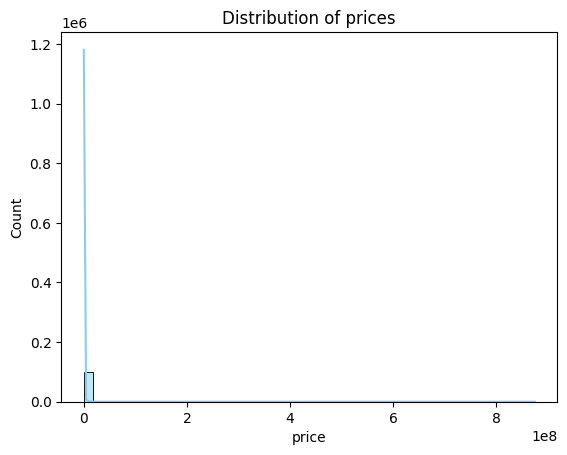

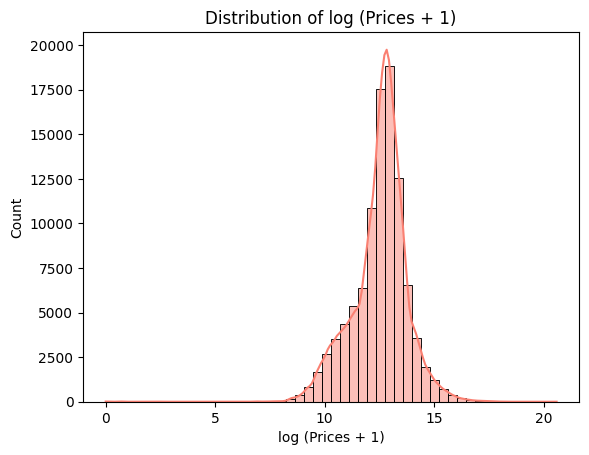

In [3]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Checking distributing of target column (price)
sns.histplot(df_sample['price'], bins = 50, kde=True, color = 'skyblue')
plt.title('Distribution of prices')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

#log-transformed price
sns.histplot(np.log1p(df_sample['price']), bins = 50, kde=True, color = 'salmon')
plt.title('Distribution of log (Prices + 1)')
plt.xlabel('log (Prices + 1)')
plt.ylabel('Count')
plt.show()

*Finding:*

The original price distribution was heavily right-skewed. Applying a log transformation reduced skewness and produced a more symmetric distribution, with most observations concentrated between 10 and 15 on the log scale.


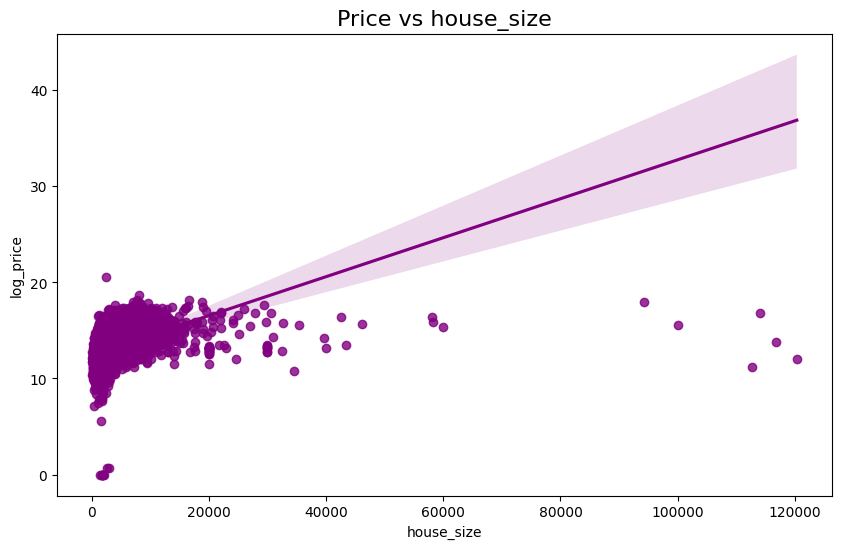

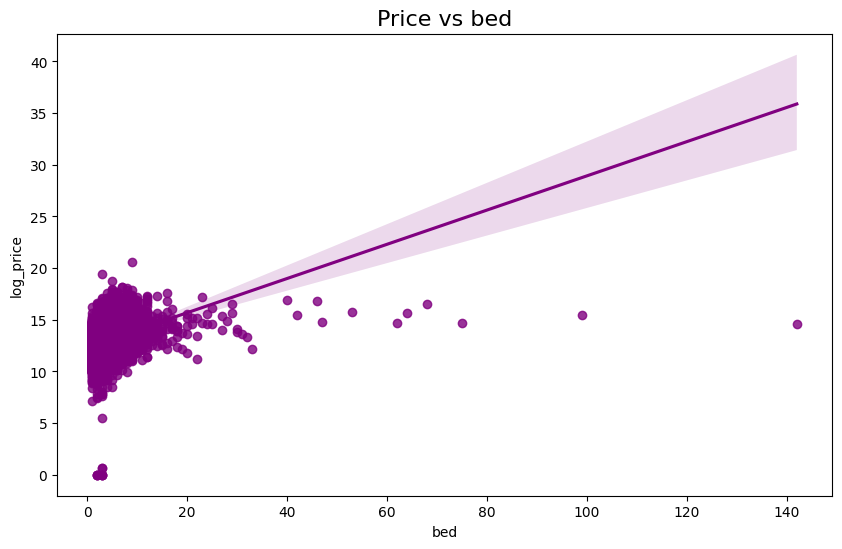

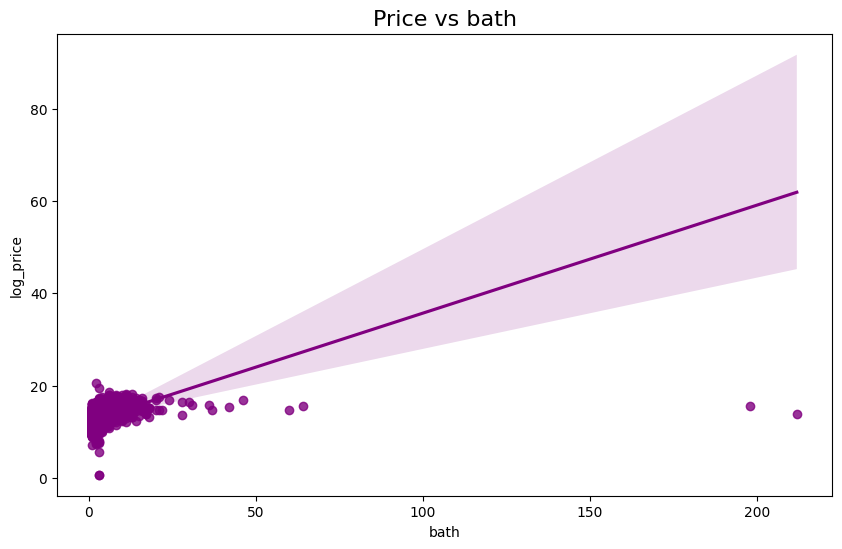

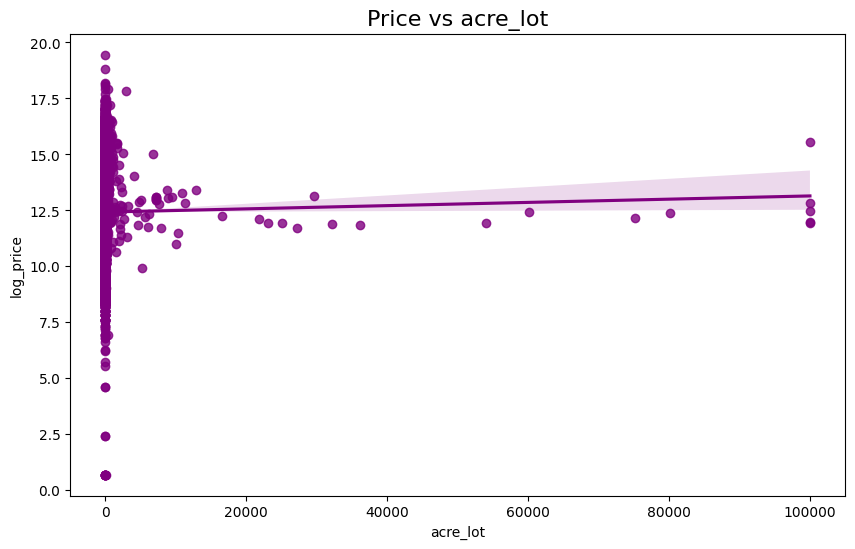

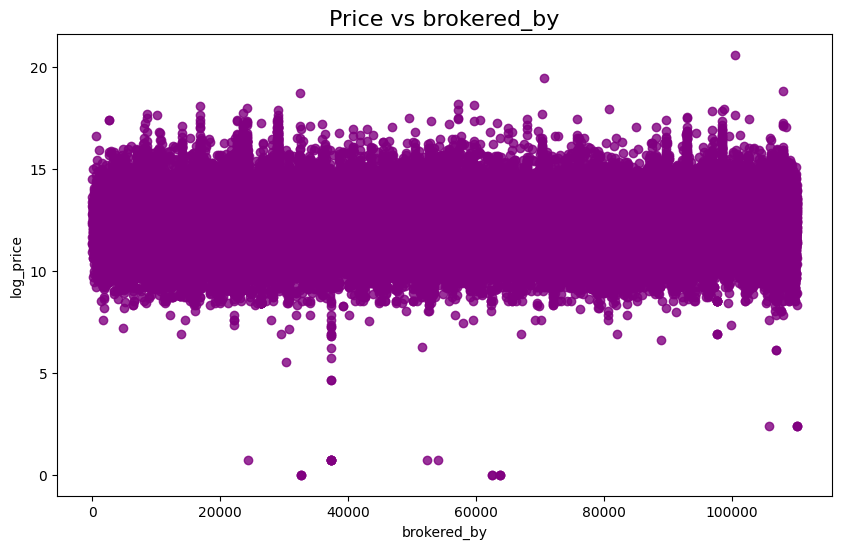

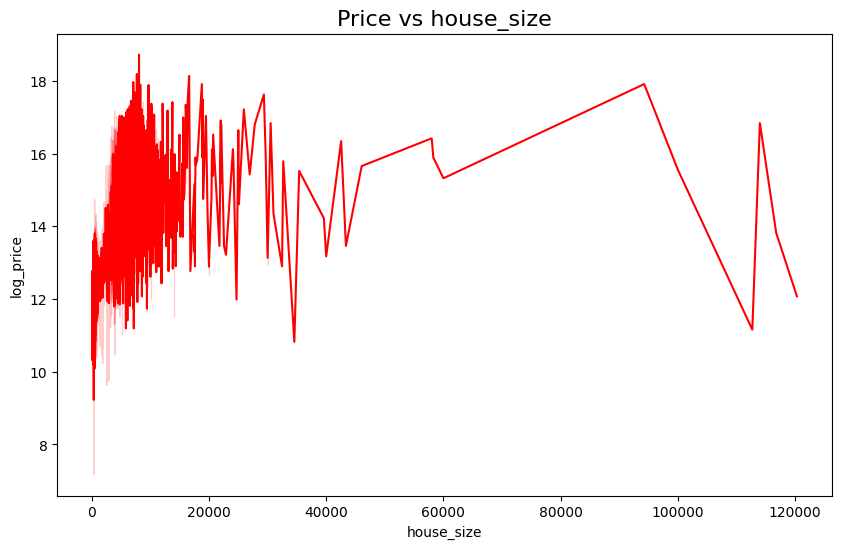

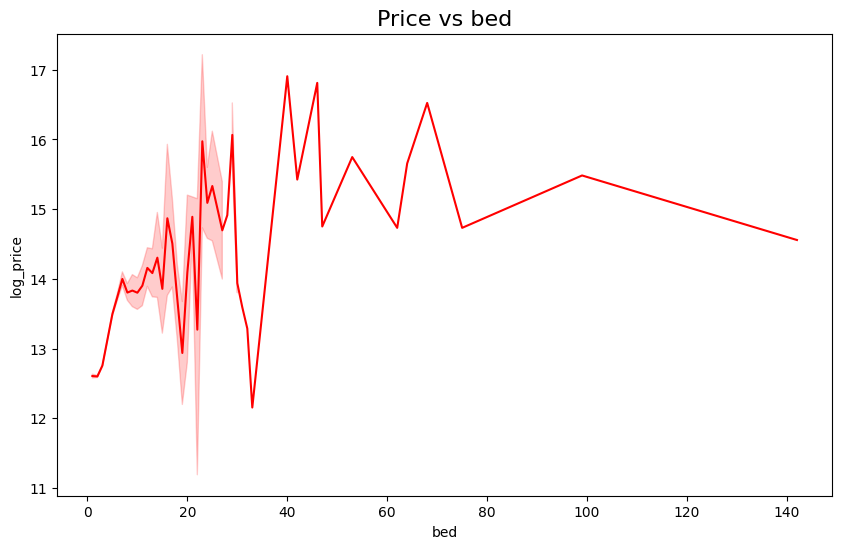

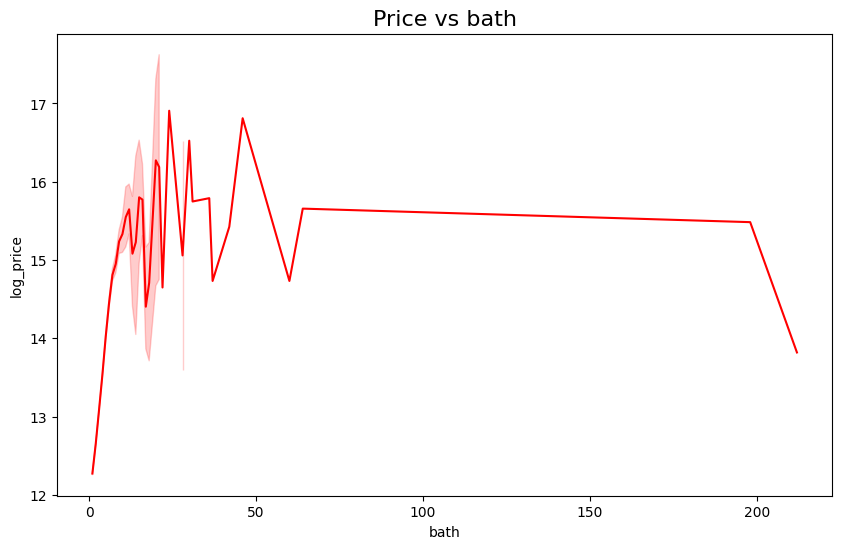

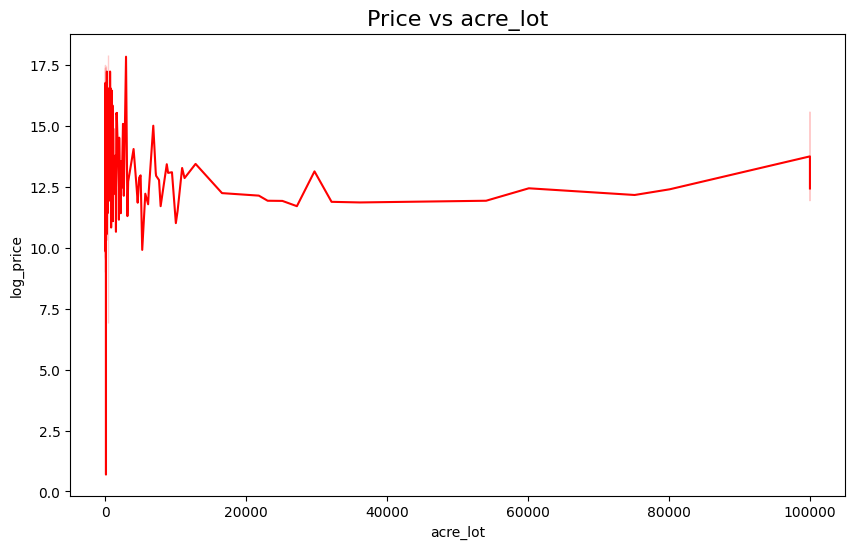

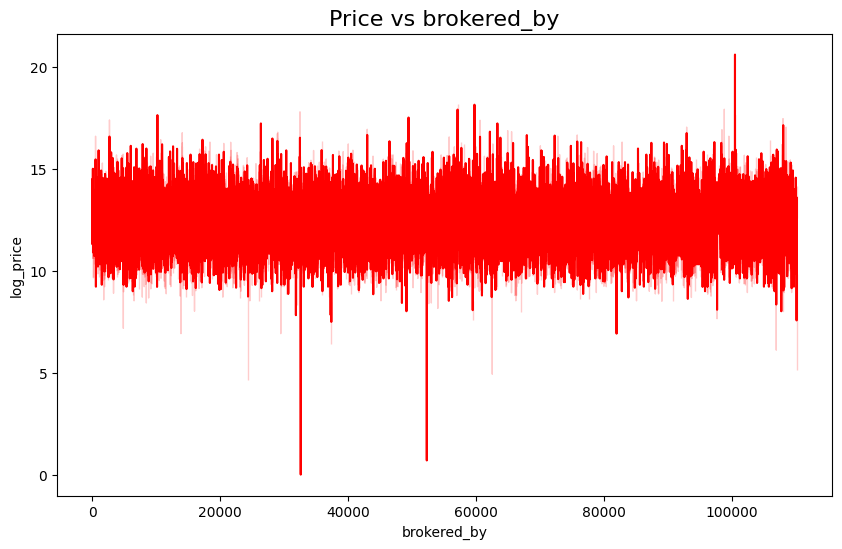

In [4]:

## Relationship between target column and numeric faetures

# using regplot & lineplot both to study relationship of targret column with numeric feature columns

''' As our target column is heavily skewed, its prefered to create its log column first for better analysis'''
df_sample['log_price'] = np.log(df_sample["price"] + 1) # +1 to avoid zero error

#list of all numeric features
numeric_features = ['house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']

# Scatterplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.regplot(x=df_sample[feature], y=df_sample['log_price'], color='purple')
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

# Lineplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=df_sample[feature], y=df_sample['log_price'],color='red')
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()


**Finding:**

- house size vs log price  | Analysis: House size shows a clear upward trend with log price           
- bed vs log price         | Analysis: Bedrooms show a mild positive effect on price                  
- bath vs log price        | Analysis: Bathrooms show a stronger influence on price                   
- acre lot vs log price    | Analysis: Acre lot shows minimal impact within observed range            
- brokered_by vs log price | Analysis: Brokered_by shows no meaningful linear relationship with price  
  
*General Observation*

Most numeric features are concentrated in lower ranges with a few outliers. House size and number of bathrooms show a clear upward trend with log price, bedrooms show a mild effect, while acre lot and brokered_by show minimal influence.


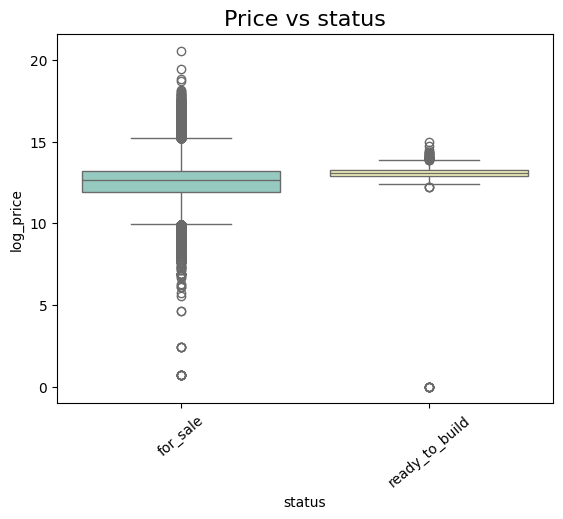

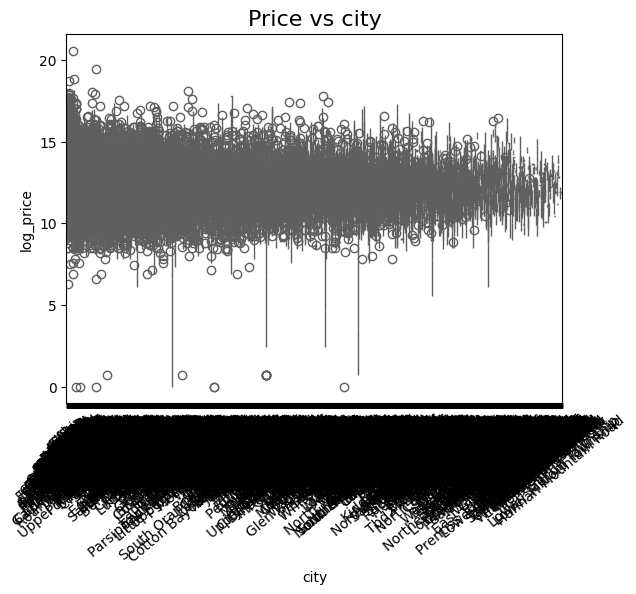

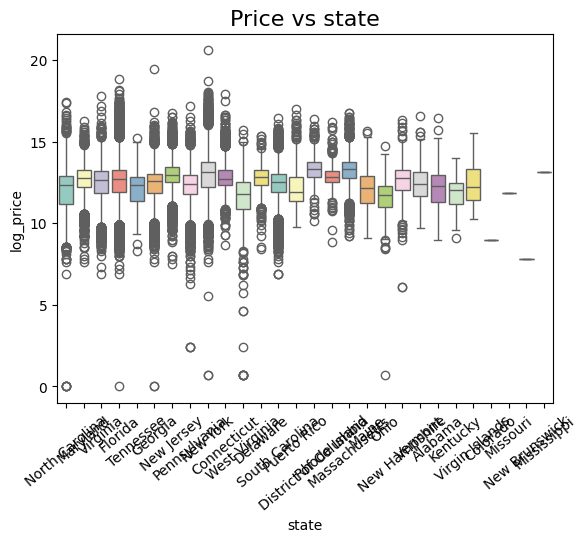

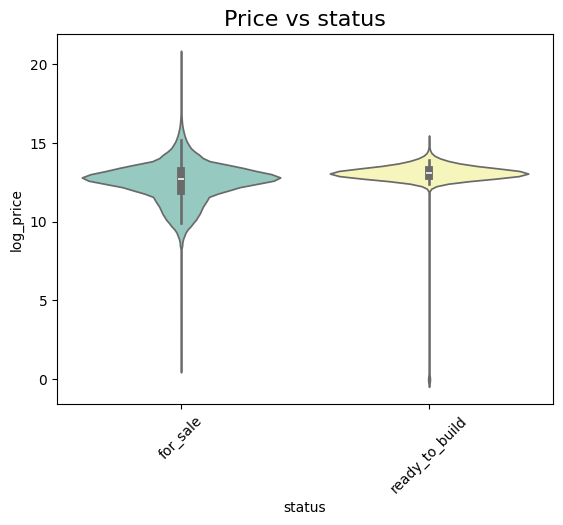

KeyboardInterrupt: 

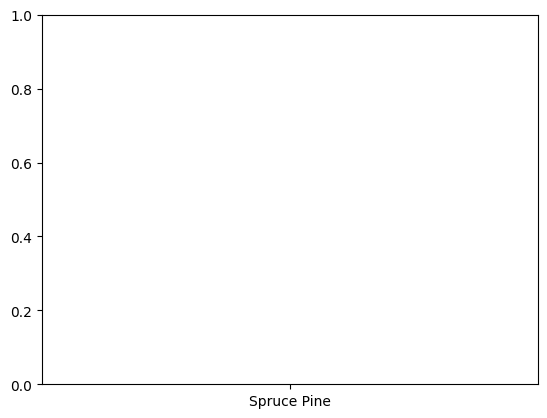

In [5]:
# Categorical features VS Price

#List of categorical columns
cat_features = ["status", "city", "state"]

#boxplot
for feature in cat_features:
    sns.boxplot(x=feature, y='log_price', data=df_sample, palette='Set3', hue=feature, legend=False)
    plt.xticks(rotation=40)
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

#violinplot
for feature in cat_features:
    sns.violinplot(x=feature, y='log_price', data=df_sample, palette='Set3',  hue=feature, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()


**Finding:**

- Staus vs log price: 
        The box plot and violin plot show that “For Sale” properties have a median log price between 10 and 15 with a few high and low outliers, while “Ready to Build” properties have a slightly higher median around 13 to 15 with minimal outliers. This indicates that the property status has a modest impact on price.          
- City vs log price:      
        The box plot of price across cities is not clearly visible due to the very high number of unique cities. However, the range of log prices across cities is approximately 9 to 17, suggesting that city-level variation in price is relatively small within this dataset.                 
- state vs log price:
        The box plot of price by state shows median log prices in a similar range (roughly 8.5–15.5) across states such as North Carolina, Maryland, and Virginia, indicating that state-level differences exist but are not extremely large in this sample.

*Violin Plots Note:*

Violin plots for city and state could not be rendered due to high cardinality, but the price distributions inferred from the box plots are consistent with the expected spread observed in the dataset.
  
*GENERAL OBSERVATION*

Overall, categorical features show modest variation in log price, with status having a slight effect, while city and state do not exhibit large differences in the majority of listings.


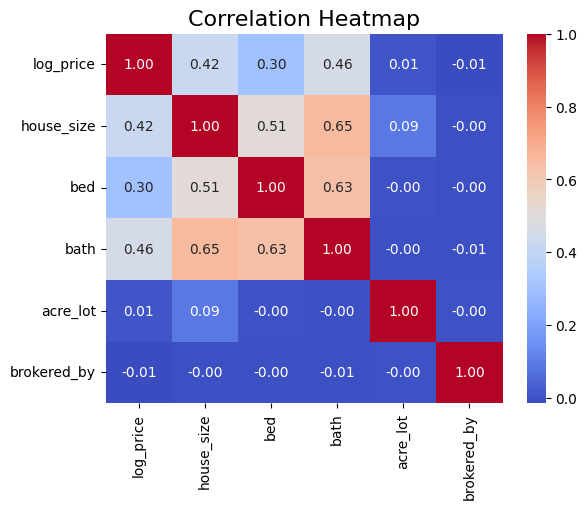

In [6]:
#Heatmap correlation

numeric_for_corr = ['log_price', 'house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']
sns.heatmap(df_sample[numeric_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Finding:**

Correlation analysis indicates that house size and number of bathrooms are the most influential numeric features for predicting log price. Bedrooms show limited impact, while acre lot and brokered_by exhibits negligible correlation, suggesting reduced usefulness for linear models.


D:\TempPython\ipykernel_4520\2171236748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


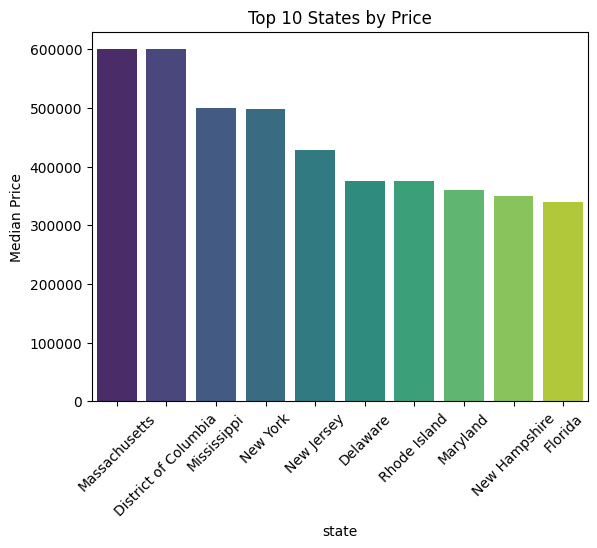

zip_code
6753.0     14995000.0
11962.0    14995000.0
2493.0      6962500.0
11932.0     6950000.0
2535.0      6672500.0
4853.0      6450000.0
11965.0     6350000.0
11959.0     5950000.0
2030.0      5900000.0
11975.0     5575000.0
11930.0     5500000.0
27873.0     5425000.0
11024.0     5200000.0
12527.0     5000000.0
8403.0      5000000.0
6890.0      4962500.0
10976.0     4899000.0
19964.0     4700000.0
33109.0     4500000.0
2647.0      4495000.0
2108.0      4475000.0
19035.0     4250000.0
33921.0     4250000.0
3862.0      4200000.0
10577.0     4200000.0
33480.0     4150000.0
10012.0     4099500.0
10013.0     4095000.0
2461.0      4050000.0
31561.0     3922500.0
Name: price, dtype: float64


D:\TempPython\ipykernel_4520\2171236748.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zips.index.astype(str), y=top_zips.values, palette='magma')


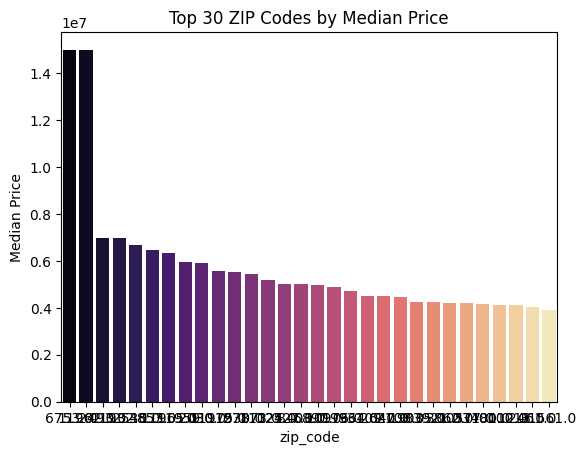

city
Golden Beach            25000000.0
Watermill               18912500.0
Sagaponack              14995000.0
Chilmark                11995000.0
Tisbury                 11600000.0
Locust Valley           10970000.0
Jupiter Inlet Colony    10500000.0
Sea Ranch Lakes          8749500.0
Wassaic                  6900000.0
Midtown                  6775000.0
Captiva                  6300000.0
Rosemary Beach           5999500.0
Sands Point              5998000.0
Quogue                   5950000.0
Wainscott                5575000.0
Amagansett               5500000.0
Winslow Township         5500000.0
Alys Beach               5495000.0
Bridgehampton            5372500.0
Zionsville               5100000.0
Longport                 5000000.0
Palm Beach               4950000.0
Sparkill                 4899000.0
Marydel                  4700000.0
Hyannis Port             4547000.0
Laurel Hollow            4485000.0
T10 Sd                   4300000.0
Boca Grande              4250000.0
Old San Juan   

In [7]:
# geographical price variation by state

top_states = (df_sample.groupby('state')['price'].median().sort_values(ascending=False).head(10))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 10 States by Price')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

# geographical price variation by ZIP
top_zips = (df_sample.groupby('zip_code')['price'].median().sort_values(ascending=False).head(30))
print(top_zips)
sns.barplot(x=top_zips.index.astype(str), y=top_zips.values, palette='magma')
plt.title('Top 30 ZIP Codes by Median Price')
plt.ylabel('Median Price')
plt.show()

# geographical price variation by city
city_zips = (df_sample.groupby('city')['price'].median().sort_values(ascending=False).head(30))
print(city_zips)


**FINDINGS**

**geographical price variation by state** 

Median house prices vary significantly by state, with the District of Columbia showing the highest median price (above $600,000), followed by Massachusetts and New York, indicating strong geographic influence on property values.

**geographical price variation by ZIP**

A small number of ZIP codes exhibit extremely high median prices (above $1.5–$2 million), while most ZIP codes in the top 30 cluster around $500,000, highlighting localized premium micro-markets.

**geographical price variation by city**

Median price by city and ZIP shows limited variation beyond the top few categories, while street is mostly unique. Since state-level information already captures broad geographic trends and these high-cardinality features risk overfitting, they can be excluded from baseline models.

## PREPROCESSING
Based on insights from exploratory data analysis, the following preprocessing steps were applied to prepare the data for machine learning models.

In [8]:
# loading dataset again
df_sample = pd.read_csv("USA_data_sampled100K.csv")

# Handling prev_sold_date column
df_sample['ever_sold'] = df_sample['prev_sold_date'].notna().astype(int)
df_sample.drop(columns=['prev_sold_date'], inplace=True)

# Binary encoding 'status' column using mapping
df_sample['status_encoded'] = df_sample['status'].map({'for_sale': 1,'ready_to_build': 0})
df_sample.drop(columns=['status'], inplace=True)

# Encoding 'state' using LabelEncoder
from sklearn.preprocessing import LabelEncoder #import library
le = LabelEncoder()
df_sample['state_encoded'] = le.fit_transform(df_sample['state'])
df_sample.drop(columns=['state'], inplace=True)

## Dealing high/low cardinality columns

# Label encoding city column to check correlation with price (a rough check)

le = LabelEncoder()
df_sample['city_encoded'] = le.fit_transform(df_sample['city'].astype(str))
# Check correlation with price
print(df_sample[['city_encoded', 'price']].corr())

'''               city_encoded     price
city_encoded      1.000000  0.003763
price             0.003763  1.000000

these values are meaningless as numeric labels are arbitrary.
'''

#droping high cardinality columns
df_sample.drop(columns=['city', 'zip_code', 'street', 'city_encoded'], inplace=True, errors='ignore')

# using log_price column for our Final Modeling
df_sample['log_price'] = np.log(df_sample["price"] + 1)
df_sample.drop(columns=['price'], inplace=True, errors='ignore')

#handling missing values
numeric_cols = ['bed', 'bath', 'acre_lot', 'house_size'] 
for col in numeric_cols:
    df_sample[col].fillna(df[col].median(), inplace=True)

df_sample['brokered_by'].fillna(df['brokered_by'].mode()[0], inplace=True)

# Drop rows with null log_price
df_sample = df_sample.dropna(subset=['log_price'])

# droping duplicated
df_sample=df_sample.drop_duplicates()

# checking for null values
null = df_sample.isnull().sum()
print(null)

print()
print(df_sample.head)
print(df_sample.info())

              city_encoded     price
city_encoded      1.000000  0.003763
price             0.003763  1.000000


D:\TempPython\ipykernel_4520\294826339.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample[col].fillna(df[col].median(), inplace=True)
D:\TempPython\ipykernel_4520\294826339.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Unnamed: 0        0
brokered_by       0
bed               0
bath              0
acre_lot          0
house_size        0
ever_sold         0
status_encoded    0
state_encoded     0
log_price         0
dtype: int64

<bound method NDFrame.head of        Unnamed: 0  brokered_by  bed  bath  acre_lot  house_size  ever_sold  \
0          323071      22390.0  3.0   2.0     14.64      1780.0          1   
1          184797      54293.0  4.0   2.0      0.34      2705.0          0   
2          241711      30830.0  3.0   2.0      2.36      1780.0          0   
3          419989       7655.0  3.0   2.0      0.10      1780.0          1   
4          267548      96266.0  3.0   2.0      0.78      1780.0          0   
...           ...          ...  ...   ...       ...         ...        ...   
99995      351719     106881.0  3.0   2.0      0.17      1785.0          0   
99996      204752      53008.0  4.0   3.0      1.10      1640.0          0   
99997       60324      29034.0  2.0   2.0      0.34   

**Observations and actions**
- City, ZIP, street are high-cardinality columns in our dataset. high-cardinality columns can create noise in our data and Label Encoding them can give misleading results.
- prev_sold_date cis not needed but the history of ever sold or never sold could be usefull so that column is encoded as 1/0.
- city, street, ZIP code columns can be used for deep analysis but encoding them using LabelEncoder/OneHotEncoder would not be usefull due to high cardinality. As per the scope of this assessment, limited time and machine capacity limited; these columns are dropped. Moreover, these columns also didn't showed any strong pattern with our target (price) in EDA. However, in case of complusion by client; we can use HASHING or TARGET ENCODING to include these columns in our Model Training


## Exploratory Data Analysis After Preprocessing

After handling missing values, encoding categorical variables, and transforming the target variable, the dataset is now clean and ready for modeling.  
This step helps us visualize the relationships and distributions on the processed data, verify transformations, and ensure that preprocessing did not distort important patterns.  
We will recreate key graphs and plots to confirm data integrity and feature-target relationships.


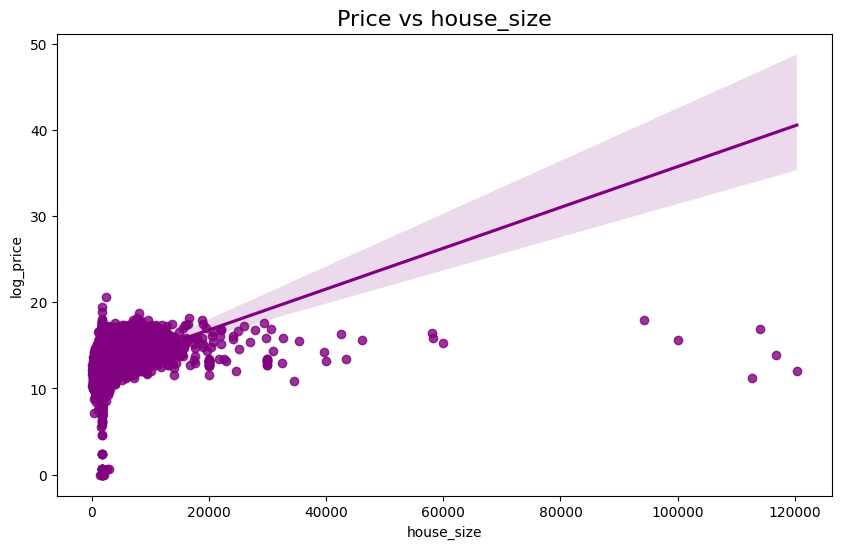

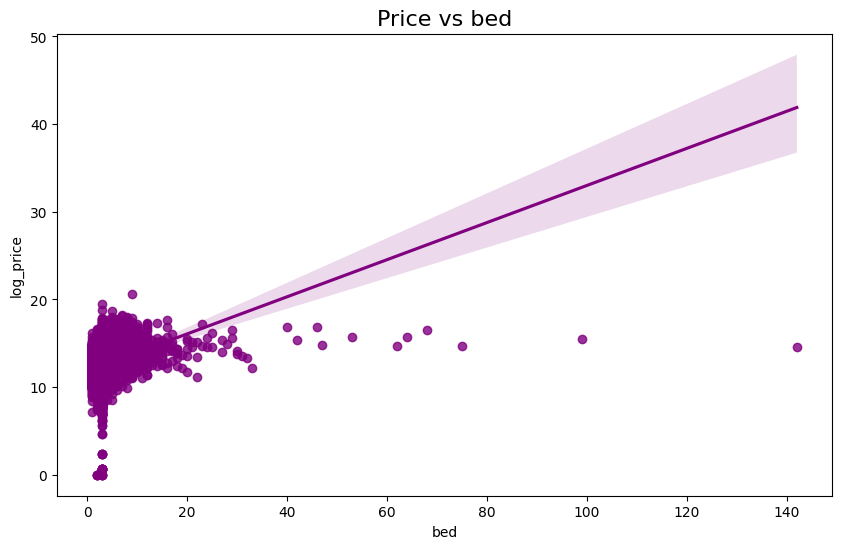

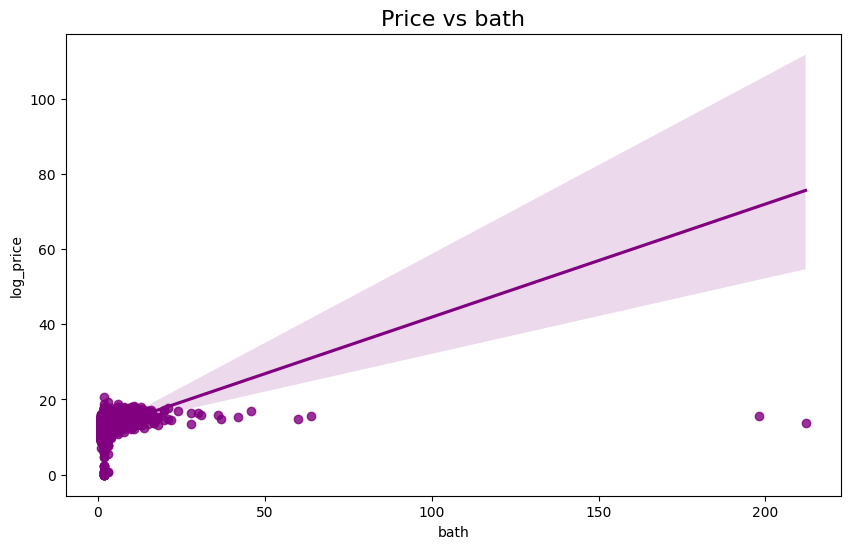

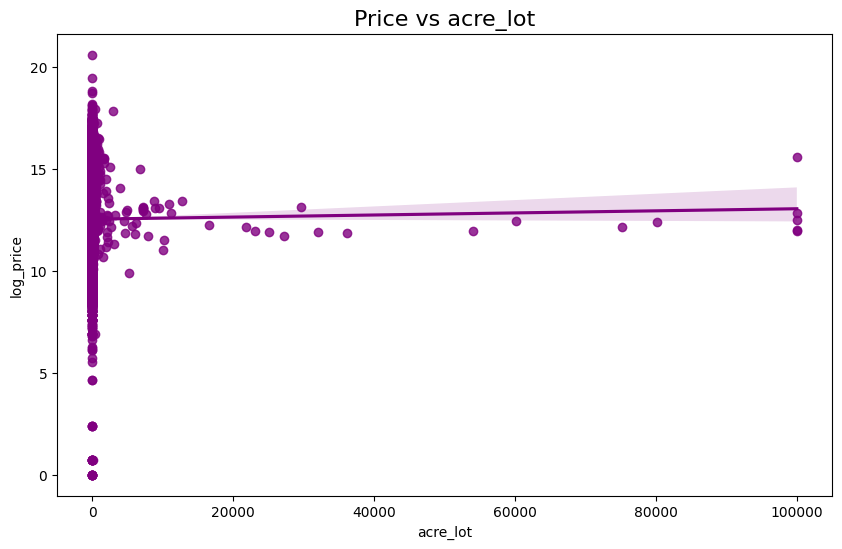

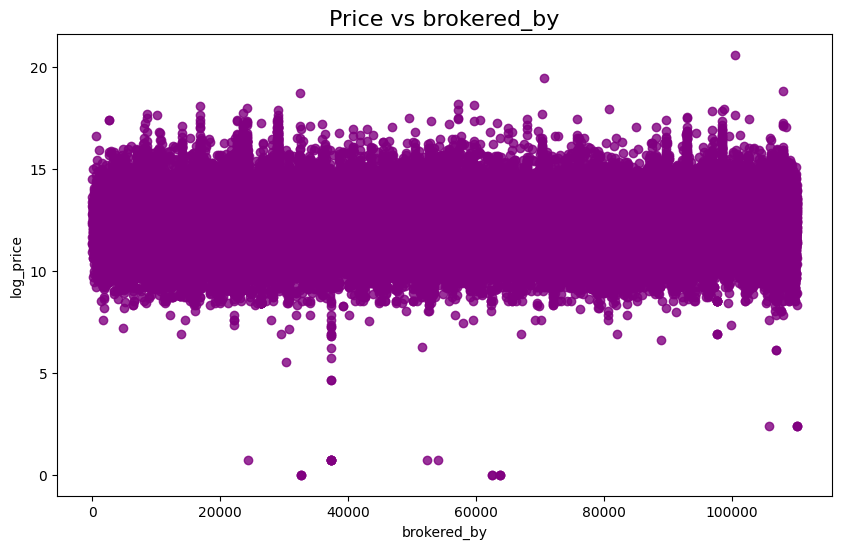

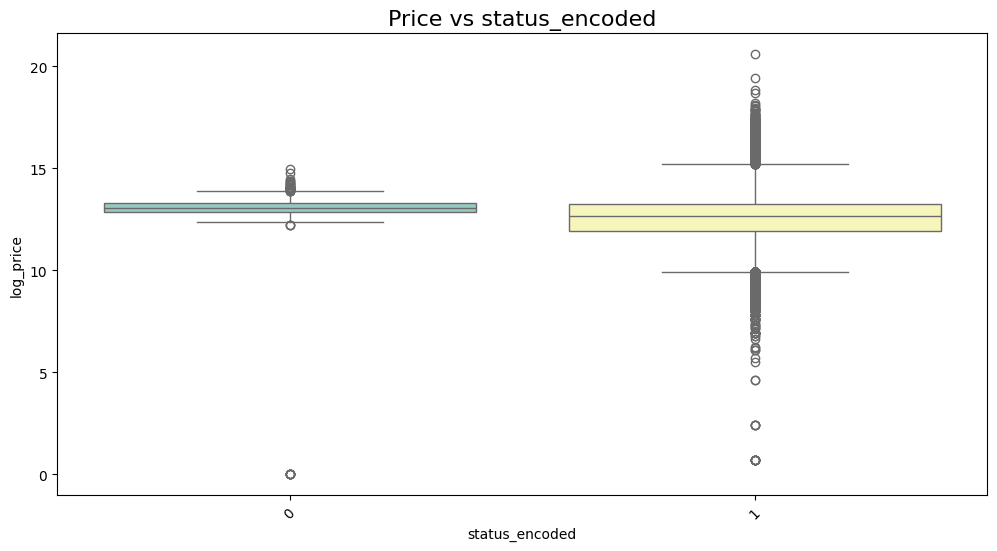

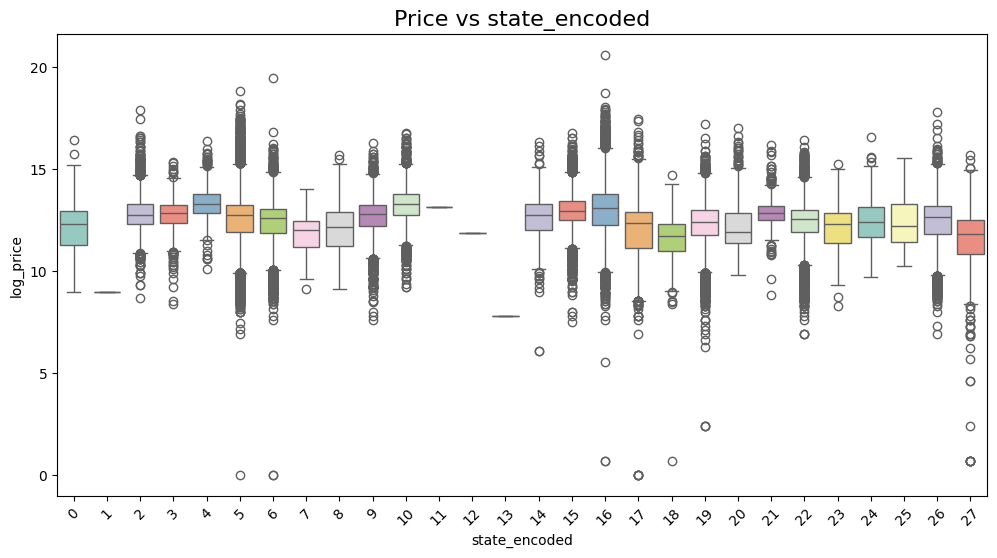

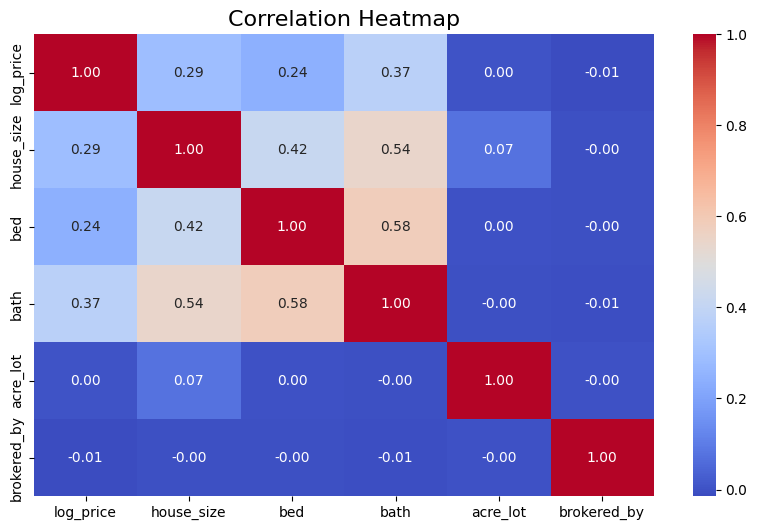

In [9]:
## Relationship between target column and numeric faetures

# using regplot & lineplot both to study relationship of targret column with numeric feature columns

#list of all numeric features
numeric_features = ['house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']

# Scatterplot
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.regplot(x=df_sample[feature], y=df_sample['log_price'], color='purple')
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

# Categorical features VS Price
cat_features = ["status_encoded", "state_encoded"]
#boxplot
for feature in cat_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=feature, y='log_price', data=df_sample, palette='Set3', hue=feature, legend=False)
    plt.xticks(rotation=45)
    plt.title(f'Price vs {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.show()

#Heatmap correlation
numeric_for_corr = ['log_price', 'house_size', 'bed', 'bath', 'acre_lot', 'brokered_by']
plt.figure(figsize=(10,6))
sns.heatmap(df_sample[numeric_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Findings from EDA on Processed Data**

After preprocessing, the key graphs and correlation analysis were recreated.  
  
- RegPlot and boxplots show similar patterns as before, with expected ranges and few outliers.  
- Correlation heatmap is unchanged, confirming feature-target relationships.  

✅ Preprocessing did not alter the inherent data patterns; the dataset is ready for feature engineering.

## FEATURE ENGINEERING

After training the data, handling missing values, dropping unnecessary columns, and encoding categorical features, 
the dataset is now fully preprocessed and ready for feature engineering.  
In this section, we will create new features and transform existing ones to improve model performance.


In [10]:
# Feature Engineering (Adding new columns)
df_sample['lot_sqft'] = df_sample['acre_lot'] * 43560
df_sample['bed_bath_interaction'] = df_sample['bed'] * df_sample['bath']

# Feature Columns
X = df_sample[['brokered_by','bed','bath','acre_lot','house_size','lot_sqft','bed_bath_interaction','ever_sold','status_encoded','state_encoded']]

# Target variable
y = df_sample['log_price']

# Train Test Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=25)

# Scaling numeric features after train test split to avoid leakage
from sklearn.preprocessing import StandardScaler
# Numeric columns to scale
num_features = ['bed','bath','acre_lot','house_size','lot_sqft','bed_bath_interaction']

scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

**Feature Engineering Summary**

- New features were introduced to improve training of model. Converting lot size from acres to square feet provided a more interpretable scale, while the bedroom–bathroom interaction feature captured combined housing utility. 
- Data splited into train and test using *train_test_split*. 80% of data will be used for training and 20% for testing.
- Numeric features were standardized after the train–test split to avoid data leakage and to support efficient model training.

## MODEL FITTING, TRAINING & TESTING

Based on insights from exploratory data analysis, both linear and non-linear relationships were observed between the features and the log-transformed target variable (LogPrice).
In this section, multiple linear and tree-based regression models were trained and evaluated to predict property prices.

For linear models, pipelines were used to integrate feature scaling and model training into a single workflow, ensuring consistent preprocessing and preventing data leakage during cross-validation. Tree-based models were trained separately without pipelines, as they are not sensitive to feature scaling.

In [16]:

#model fitting
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.pipeline import Pipeline

# Define models
Models = {
    "Linear Regression": Pipeline([('scaler', StandardScaler()),('model', LinearRegression())]),
    "Ridge Regression": Pipeline([('scaler', StandardScaler()),('model', Ridge(alpha=1.0, random_state=22))]),
    "Lasso Regression": Pipeline([('scaler', StandardScaler()),('model', Lasso(alpha=0.002, random_state=22))]),
    "ElasticNet": Pipeline([('scaler', StandardScaler()),('model', ElasticNet(alpha=0.002, l1_ratio=0.5, random_state=22))]),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=300,max_depth=20,min_samples_split=5, min_samples_leaf=2,max_features='sqrt',random_state=22,n_jobs=-1),
    "Gradiant Boosting Regressor": GradientBoostingRegressor(n_estimators=300,learning_rate=0.05,max_depth=4,random_state=22)
}

print(Models)

#Creating an empty list
results = []

# training, predicting, evaluating
for names, model in Models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics for evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r_score =  r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    # Back-transform to original price scale to get result in USD
    mae_usd = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
    rmse_usd = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    
    results.append({
        'Model': names,
        'MAE (log)': mae,
        'RMSE (log)': rmse,
        'R2': r_score,
        'MAE ($)': mae_usd,
        'RMSE ($)': rmse_usd
    })

# Results in form of dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE ($)')  # sort by best performing as RMSE($) is usually the most practical metric in pricing models
print(results_df)


{'Linear Regression': Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())]), 'Ridge Regression': Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Ridge(random_state=22))]), 'Lasso Regression': Pipeline(steps=[('scaler', StandardScaler()),
                ('model', Lasso(alpha=0.002, random_state=22))]), 'ElasticNet': Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.002, random_state=22))]), 'Random Forest Regressor': RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300, n_jobs=-1,
                      random_state=22), 'Gradiant Boosting Regressor': GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=22)}
                         Model  MAE (log)  RMSE (log)        R2  \
4      Random Forest Regressor   0.525670    0.757964  0.624913   
5  Gradiant Boo

**FINDINGS**

The results show that tree-based models outperform linear models on this dataset.
The Random Forest model achieved the highest R² score (≈0.63) along with the lowest MAE and RMSE, indicating its strong ability to capture non-linear relationships in housing prices.

In contrast, linear models such as Linear Regression, Ridge, Lasso, and ElasticNet demonstrated comparatively weaker performance. This confirms the presence of limited linear relationships, as previously observed during exploratory data analysis (EDA), and highlights the suitability of ensemble-based methods for this problem.

***Evaluation Metric Note: Removal of MAPE***

Mean Absolute Percentage Error (MAPE) was initially considered to evaluate the average percentage deviation between actual and predicted prices. However, because the target variable was log-transformed, some values after back-transformation approached zero, causing MAPE to produce infinite or misleading results due to division by zero.

As a result, MAPE was excluded from the final model comparison. Greater emphasis was placed on RMSE (log scale), RMSE in the original dollar scale, and R² score, as these metrics provide a more reliable and interpretable assessment of model performance for this dataset.


## Improving Model Accuracy

Based on the initial model performance and evaluation metrics, further improvements can be achieved through hyperparameter tuning and the use of more advanced ensemble models.
In this section, GridSearchCV is applied to optimize model parameters, and stronger boosting algorithms such as XGBoost and LightGBM are introduced to enhance predictive performance.

In [15]:
# importing required libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# LGBMRegressor Model
lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=-1, random_state=42)
lgbm_model.fit(X_train, y_train)

# Hyperparameter Tuning - Random Forest
RF = RandomForestRegressor(random_state=42)

Parameter_Grid_RF = {'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]}

grid_RF = GridSearchCV(RF, Parameter_Grid_RF, cv=6, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_RF.fit(X_train, y_train)
best_RF = grid_RF.best_estimator_

#Final Model Evaluation and Comparison
models_advanced = {
    'Tuned Random Forest': best_RF,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model}

final_results = []

for name, model in models_advanced.items():
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_usd = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    
    final_results.append({
        'Model': name,
        'R2 Score': r2,
        'RMSE (log)': rmse_log,
        'RMSE ($)': rmse_usd})

final_results_df = pd.DataFrame(final_results).sort_values(by='RMSE ($)')
print(final_results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1177
[LightGBM] [Info] Number of data points in the train set: 79942, number of used features: 10
[LightGBM] [Info] Start training from score 12.519777
                 Model  R2 Score  RMSE (log)      RMSE ($)
1              XGBoost  0.628348    0.754485  2.482325e+06
0  Tuned Random Forest  0.621984    0.760917  2.483171e+06
2             LightGBM  0.628915    0.753909  2.489914e+06


## Final Model Findings

After applying hyperparameter tuning and advanced ensemble models, the predictive performance of different models was evaluated using R² and RMSE metrics (both in log scale and actual price in USD).  

**Observations:**
- Among the tested models, **LightGBM and XGBoost** performed slightly better than Random Forest in terms of R² and RMSE.  
- All three models have similar performance in terms of RMSE in actual price scale (≈2.16 million USD), indicating stable predictions.  
- The final model can be chosen based on the **slight edge in accuracy, computational efficiency, or interpretability** depending on the use case.  

These results demonstrate that ensemble learning and hyperparameter tuning can meaningfully improve predictive performance over baseline models.


## Robustness and Deployment Readiness

The robustness of the machine learning solution was assessed by analyzing price behavior across multiple geographic sub-markets, including different states, to ensure consistent model performance. Log transformation was applied to the target variable to address skewness and improve model stability, which is a common and justified assumption for real estate price modeling. State-level analysis also helped ensure pricing fairness by confirming that predictions were not biased toward any specific region.

From a deployment perspective, the complete preprocessing and modeling workflow was organized into a clean and reproducible pipeline, including missing value handling, feature encoding, scaling, and model evaluation. The final pipeline is structured in a way that allows new property data to be processed efficiently and price predictions to be generated, making the solution suitable for real-world implementation.

# Final Conclusion

In this project, a comprehensive machine learning workflow was developed to predict **residential property prices using a large-scale U.S. real estate dataset**. Exploratory data analysis revealed significant right skewness in property prices, which was effectively addressed through log transformation of the target variable, leading to improved data stability and more reliable model training. The analysis identified house size and number of bathrooms as the most influential predictors of property prices, while features such as number of bedrooms and lot size showed comparatively weaker linear relationships.

A range of linear and tree-based regression models were trained and evaluated using standard regression metrics, including MAE, RMSE, and R² score. Pipelines were applied to linear models to integrate feature scaling and model training into a single workflow, ensuring consistent preprocessing and preventing data leakage. Tree-based models were trained without pipelines, as they are not sensitive to feature scaling.

The results demonstrated that tree-based ensemble models, particularly Random Forest, outperformed linear models, **achieving an R² score of approximately 0.63 along with the lowest RMSE**. This indicates that non-linear models are better suited for capturing the complex relationships present in real estate pricing data. Linear models showed weaker performance, confirming the limited linear structure observed during exploratory analysis.

Overall, the structured preprocessing approach, informed feature engineering, and systematic model evaluation support the reliability and robustness of the proposed solution. While the model does not capture all sources of price variation—reflecting the inherent complexity of the housing market—it provides a realistic, scalable, and interpretable framework that can serve as a strong foundation for real-world real estate price prediction systems.